# Homework 4 Spring 2022

Due 04/18 23:59 

Alexandre RAEVEL

atr2122

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pprint 
pp = pprint.PrettyPrinter(indent=4)


# Part 1: Feed forward network from scratch!

For this part, you are not allowed to use any library other than numpy. 

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each parameter wrt to the loss) for the following neural network:

<img src="https://github.com/W4995-AML/assignment-4-spring2022/blob/main/images/nn.png?raw=1" width=400 height=400/>

The weight matrix for the hidden layer is W1 and has bias b1. 

The weight matrix for the ouput layer is W2 and has bias b2.

Activatation function is **sigmoid** for both hidden and output layer

Loss function is the MSE loss $$L(y,y_t) = \frac{1}{2N}\sum_{n=1}^{N}(y^n - y_{t}^{n})^2$$

Refer to the below dictionary for dimensions for each matrix

In [ ]:
np.random.seed(0) # don't change this

weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation
    
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    
    Z2 = np.dot(H,weights['W2'].T)   + weights['b2']
    Y  = sigmoid(Z2)

    return Y, Z2, H, Z1

In [ ]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))
    
    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)

    dZ2dH       = weights['W2']
    dLdH        = np.outer(dLdZ2,dZ2dH)
    dHdZ1       = sigmoid(Z1)*(1-sigmoid(Z1))
    #print('dZ2dH shape:', dZ2dH.shape)
    #print('dHdZ1 shape:', dHdZ1.shape)
    dLdZ1       = np.multiply(dLdH,dHdZ1)
    dLdb1       = np.sum(dLdZ1,axis=0).T
    dLdb2       = np.sum(dLdZ2)
    #print('dLdZ1 shape:', dLdZ1.shape)
    #print('dLdb1 shape:', dLdb1.shape)
    #print('dLdb2 shape:', dLdb2.shape)
    dLdW1       = np.dot(dLdZ1.T,X)

    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    
    return gradients, L

In [ ]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [ ]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596,  0.00262019],
       [-0.00030765, -0.00024188],
       [-0.00034768, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


Your answers should be close to L = 0.133 and 
'b1': array([ 0.00492, -0.000581, -0.00066]). You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

You can use any library for the following questions.

# Part 2: Fashion MNIST dataset
The Fashion-MNIST dataset is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It's commonly used as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning models. You can read more about the dataset at the [Fashion-MNIST homepage](https://github.com/zalandoresearch/fashion-mnist). 

We will utilize tensorflow to import the dataset, however, feel free to use any framework (TF/PyTorch) to answer the assignment questions.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# load data
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


### 2.1 Plot the first 25 samples from both development and test sets on two separate 5$\times $5 subplots. 

Each image in your subplot should be labelled with the ground truth label. Get rid of the plot axes for a nicer presentation. You should also label your plots to indicate if the plotted data is from development or test set. You are given the expected output for development samples.

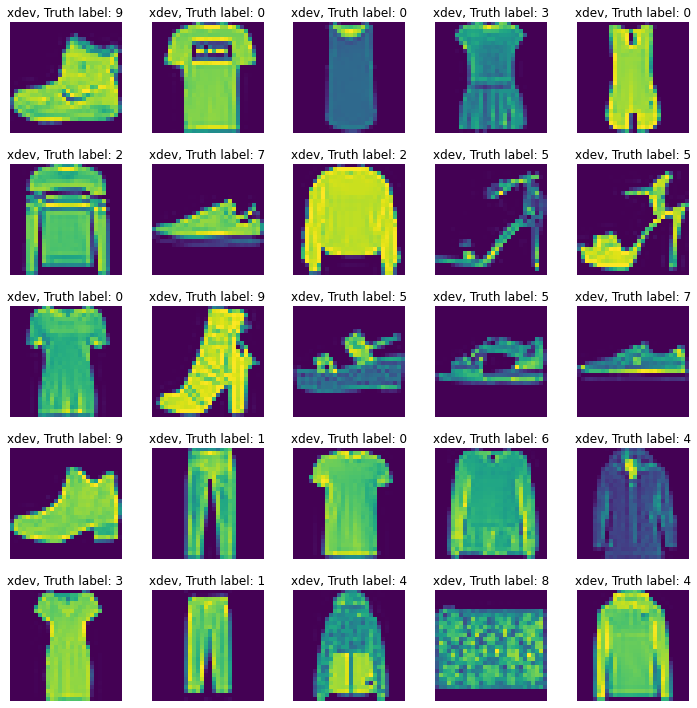

In [ ]:
# Plot dev samples
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

def plot_categories(training_images, training_labels,label):
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    axes = axes.flatten()

    for k in range(25):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img)
        ax.set_title(label + ", Truth label: "+  str(training_labels[k]))
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(xdev, ydev,"xdev")

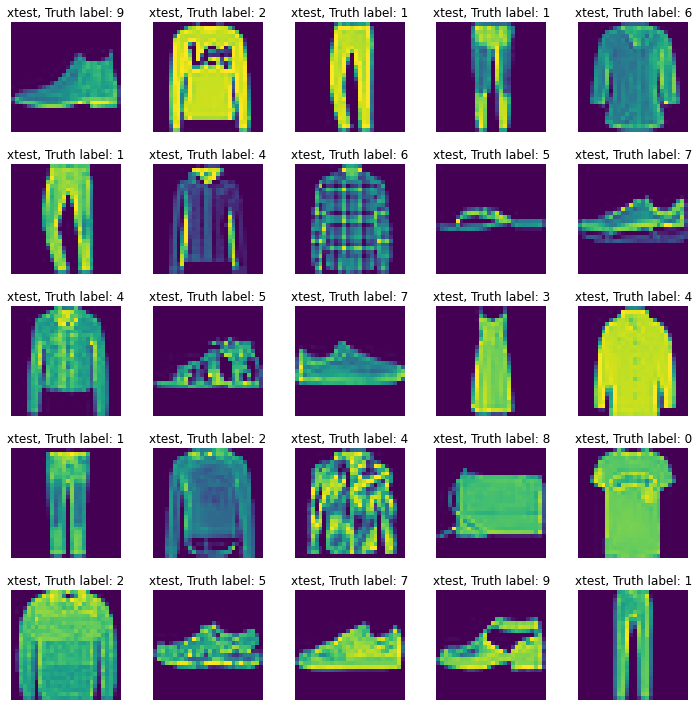

In [ ]:
# Plot test samples
plot_categories(xtest, ytest,"xtest")

# Part 3: Feed Forward Network

In this part of the homework, we will build and train a deep neural network on the Fashion-MNIST dataset.

### 3.1.1 Print their shapes - $x_\text{dev}, y_{\text{dev}}, x_\text{test}, y_\text{test}$

In [ ]:
# Print
print("The shape of xdev is:",xdev.shape)
print("The shape of ydev is:",ydev.shape)
print("The shape of xtest is:",xtest.shape)
print("The shape of ytest is:",ytest.shape)

The shape of xdev is: (60000, 28, 28)
The shape of ydev is: (60000,)
The shape of xtest is: (10000, 28, 28)
The shape of ytest is: (10000,)


### 3.1.2 Flatten the images into one-dimensional vectors. Again, print out the shapes of $x_\text{dev}, x_\text{test}$

In [ ]:
# Flatten and print
rows, cols, dim = xdev.shape

xdev = xdev.flatten().reshape(rows, cols*dim)
print(xdev.shape)

rows, cols, dim = xtest.shape
xtest_saved = xtest
xtest = xtest.flatten().reshape(rows, cols*dim)
print(xtest.shape)

(60000, 784)
(10000, 784)


### 3.1.3 Standardize the development and test sets. 

Note that the images are 28x28 numpy arrays, and each pixel takes value from 0 to 255.0. 0 means background (white), 255 means foreground (black).

In [ ]:
# Standardize
xdev = xdev.astype('float32')
xdev = xdev/255
xtest.astype('float32')
xtest = xtest/255



### 3.1.4 Assume your neural network has softmax activation as the last layer activation. Would you consider encoding your target variable? Which encoding would you choose and why? The answer depends on your choice of loss function too, you might want to read 2.2.1 and 2.2.5 before answering this one!

Encode the target variable else provide justification for not doing so. Supporting answer may contain your choice of loss function.


In [ ]:
# answer
from keras.utils.np_utils import to_categorical

# Yes, we do consider encoding the target variable -> we choose one-hot encoding here because of the way the softmax activation function works, in that it produces a value between 0 and 1

num_classes = 10

ydev = to_categorical(ydev,num_classes)
ytest = to_categorical(ytest,num_classes)

### 3.1.5 Train-test split your development set into train and validation sets (8:2 ratio). 

Note that splitting after encoding does not causes data leakage here because we know all the classes beforehand.

In [ ]:
# split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(xdev, ydev, test_size=0.2, random_state=42)

print("The shape of X_train is:",X_train.shape)
print("The shape of X_val is:",X_val.shape)

The shape of X_train is: (48000, 784)
The shape of X_val is: (12000, 784)


### 3.2.1 Build the feed forward network

Using Softmax activation for the last layer and ReLU activation for every other layer, build the following model:

1. First hidden layer size - 128
2. Second hidden layer size - 64
3. Third and last layer size - You should know this



In [ ]:
# build model
from keras.models import Sequential
from keras.layers import Activation, Dense

model = Sequential([
                    Dense(128,input_shape=(784,)),
                    Activation('relu'),
                    Dense(64),
                    Activation('relu'),
                    Dense(10),
                    Activation('softmax')
])

### 3.2.2 Print out the model summary

In [ ]:
# print summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trai

### 3.2.3 Report the total number of trainable parameters. Do you think this number is dependent on the image height and width? Only Yes/No required. 

In [ ]:
# answer
# From the previous question, we see the total number of trainable parameters is 109,386
# Yes, it does depend on image height/width -> (784 + 1)*128 + (128+1)*64 + (64+1)*10

### 3.2.4 Print out your model's output on first train sample. This will confirm if your dimensions are correctly set up. Is the sum of this output equal to 1 upto two decimal places?

In [ ]:
# answer
res = model.predict(X_train)
print("The shape of the model prediction on the training data is:",res.shape)
print("The output of the model on the first train sample is:", res[0,:])
print("The sum of the output on the first train sample is:", round(sum(res[0,:]),2))

The shape of the model prediction on the training data is: (48000, 10)
The output of the model on the first train sample is: [0.1698508  0.07522605 0.13160099 0.05381695 0.07621104 0.06649049
 0.10064184 0.09790491 0.10170102 0.12655593]
The sum of the output on the first train sample is: 1.0


### 3.2.5 Considering the output of your model and overall objective, what loss function would you choose and why? Choose a metric for evaluation and explain the reason behind your choice.

In [ ]:
# Cross-entropy is the default loss function to use for multi-class classification problems, which is what we are dealing with in this problem
# It is intended for use with multi-class classification where the target values are in the set {0, 1, 3, …, n}, where each class is assigned a unique integer value, which is the case for this dataset
# Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0.


# We are choosing the accuracy metric here as it is the simplest and most common metric used 

### 3.2.6 Using the metric and loss function above, with Adam as the optimizer, train your model for 20 epochs with batch size 128. 

Make sure to save and print out the values of loss function and metric after each epoch for both train and validation sets.

Note - Use appropriate learning rate for the optimizer, you might have to try different values

In [ ]:
# train
model.compile('adam','categorical_crossentropy',metrics=["accuracy"])
history_callback = model.fit(X_train,y_train,batch_size=128,epochs=20,validation_data=(X_val, y_val),verbose=1)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.5768 - accuracy: 0.8000 - val_loss: 0.4460 - val_accuracy: 0.8447
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4071 - accuracy: 0.8564 - val_loss: 0.3915 - val_accuracy: 0.8593
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3639 - accuracy: 0.8690 - val_loss: 0.4000 - val_accuracy: 0.8554
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8787 - val_loss: 0.3671 - val_accuracy: 0.8677
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3170 - accuracy: 0.8846 - val_loss: 0.3389 - val_accuracy: 0.8776
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3017 - accuracy: 0.8894 - val_loss: 0.3541 - val_accuracy: 0.8710
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2837 - accuracy: 0.8963 - val_loss: 0.3480 - val_accuracy: 0.8764
Epoch 

### 3.2.7 Plot two separate plots displaying train vs validation loss and train vs validation metric scores over each epoch

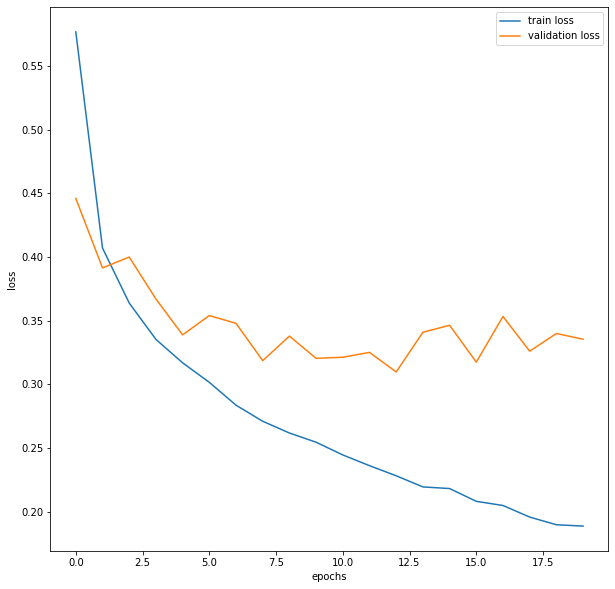

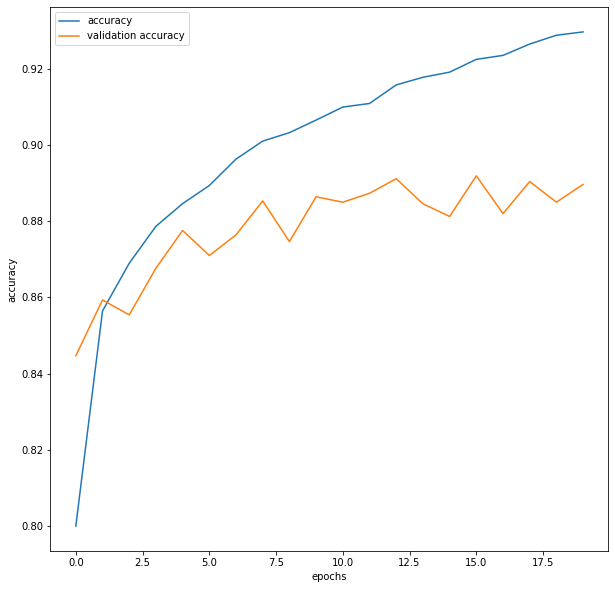

In [ ]:
# plot
import pandas as pd

plt.figure(figsize=(10, 10))
hist = pd.DataFrame(history_callback.history)
plt.plot(hist.index,hist["loss"],label='train loss')
plt.plot(hist.index,hist["val_loss"],label='validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
hist = pd.DataFrame(history_callback.history)
plt.plot(hist.index,hist["accuracy"],label='accuracy')
plt.plot(hist.index,hist["val_accuracy"],label='validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

### 3.3.1 Report metric score on test set

In [ ]:
# evaluate
score = model.evaluate(xtest,ytest,verbose=1)
print("Test loss: {:.3f}".format(score[0]))
print("Test accuracy: {:.3f}".format(score[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.8827
Test loss: 0.356
Test accuracy: 0.883


### 3.3.2 Plot confusion matrix on the test set and label the axes appropriately with true and predicted labels. 

Labels on the axes should be the original classes (0-9) and not one-hot-encoded. To achieve this, you might have to reverse transform your model's predictions. Please look into the documentation of your target encoder. Sample output is provided

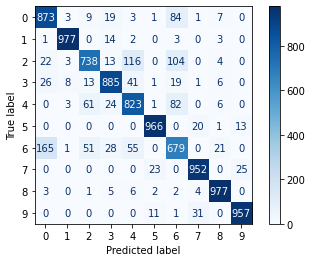

In [ ]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

predict_x = model.predict(xtest) 
classes_x = np.argmax(predict_x,axis=1)
classes_y = np.argmax(ytest,axis=1)

cm = confusion_matrix(classes_y,classes_x)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### 3.3.3 Plot the first 25 samples of test dataset on a 5$\times $5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). 

For instance, an image of class 3, with predicted class 7 should have the label GT:3, P:7. Get rid of the plot axes for a nicer presentation.

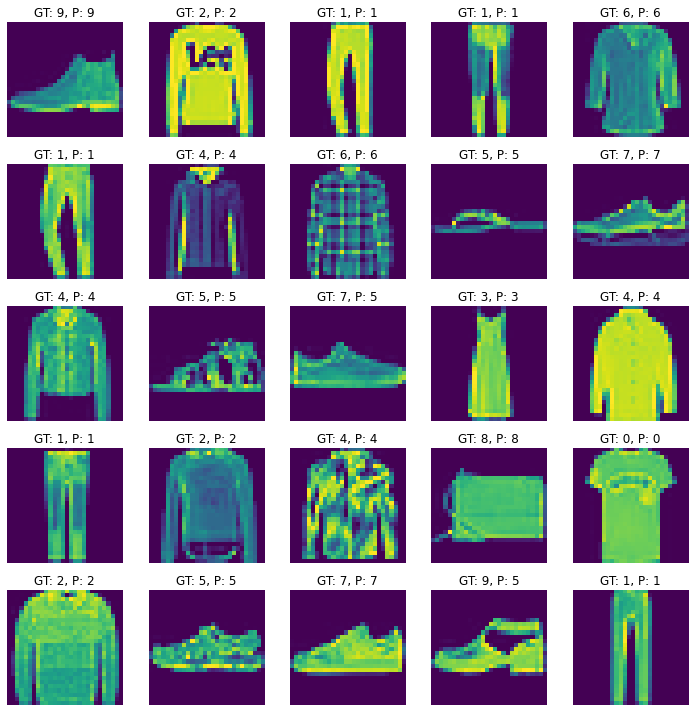

In [ ]:
# Plot with predictions
def plot_categories2(training_images, training_labels,predicted_label):
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    axes = axes.flatten()

    for k in range(25):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img)
        ax.set_title("GT: " +  str(training_labels[k]) +  ", " + "P: " + str(int(predicted_label[k])))
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories2(xtest_saved, classes_y,classes_x)

# Part 4: Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network, LeNet-5, on the Fashion-MNIST dataset. 

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# load data again
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

### 4.1 Preprocess

1. Standardize the datasets

2. Encode the target variable.

3. Split development set to train and validation sets (8:2).

In [ ]:
# TODO: Standardize the datasets
xdev  = xdev/255
xtest = xtest/255
print(type(xdev))
# TODO: Encode the target labels

num_classes = 10

ydev = to_categorical(ydev,num_classes)
ytest = to_categorical(ytest,num_classes)
# Split
X_train, X_val, y_train, y_val = train_test_split(xdev, ydev, test_size=0.2, random_state=42)


<class 'numpy.ndarray'>


### 4.2.1 LeNet-5

We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1. 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1  padded to yield the same size as input, ReLU activation
2. Maxpooling layer of 2x2
3. 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation 
4. Maxpooling layer of 2x2 
5. 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!
6. A fully connected layer with 84 units, ReLU activation
7. The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [ ]:
# TODO: build the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten

input_shape = (28,28,1)
# cnn = Sequential()
# cnn.add(Conv2D(6,kernel_size=(5,5),activation='relu',padding='valid',input_shape=input_shape))
# cnn.add(MaxPooling2D(pool_size=(2,2)))
# cnn.add(Conv2D(16,kernel_size=(5,5),activation='relu'))
# cnn.add(MaxPooling2D(pool_size=(2,2)))
# cnn.add(Conv2D(120,kernel_size=(5,5),activation='relu'))

model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', strides=(1,1), padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu',strides=(1,1),padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=120,kernel_size=(5, 5),activation='relu',strides=(1,1)))
model.add(Flatten())
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation = 'softmax'))


### 4.2.2 Report layer output

Report the output dimensions of each layers of LeNet-5. **Hint:** You can report them using the model summary function that most frameworks have, or you can calculate and report the output dimensions by hand (It's actually not that hard and it's a good practice too!)

In [ ]:
# TODO: report model output dimensions
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)              

### 4.2.3 Model training

Train the model for 10 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets. Use two separate plots to display train vs validation metric scores and train vs validation loss. Finally, report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [ ]:
# TODO: Train the model
model.compile('adam','categorical_crossentropy',metrics=["accuracy"])
print(X_train.shape)
print(y_train.shape)
history_callback2 = model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_val, y_val),verbose=1)

(48000, 28, 28)
(48000, 10)
Epoch 1/10
375/375 [==============================] - 13s 34ms/step - loss: 0.6992 - accuracy: 0.7448 - val_loss: 0.5093 - val_accuracy: 0.8174
Epoch 2/10
375/375 [==============================] - 12s 32ms/step - loss: 0.4400 - accuracy: 0.8427 - val_loss: 0.3951 - val_accuracy: 0.8622
Epoch 3/10
375/375 [==============================] - 12s 32ms/step - loss: 0.3756 - accuracy: 0.8646 - val_loss: 0.3701 - val_accuracy: 0.8652
Epoch 4/10
375/375 [==============================] - 12s 33ms/step - loss: 0.3372 - accuracy: 0.8775 - val_loss: 0.3265 - val_accuracy: 0.8797
Epoch 5/10
375/375 [==============================] - 12s 32ms/step - loss: 0.3167 - accuracy: 0.8851 - val_loss: 0.3178 - val_accuracy: 0.8846
Epoch 6/10
375/375 [==============================] - 12s 32ms/step - loss: 0.2966 - accuracy: 0.8914 - val_loss: 0.3114 - val_accuracy: 0.8852
Epoch 7/10
375/375 [==============================] - 12s 32ms/step - loss: 0.2825 - accuracy: 0.8961 - val_

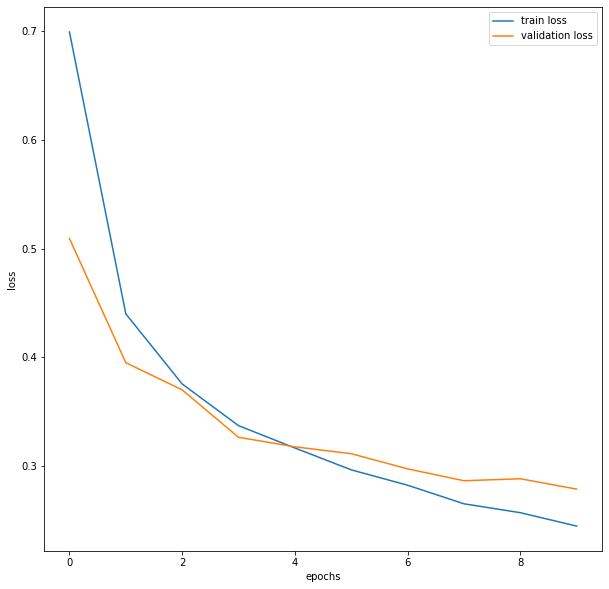

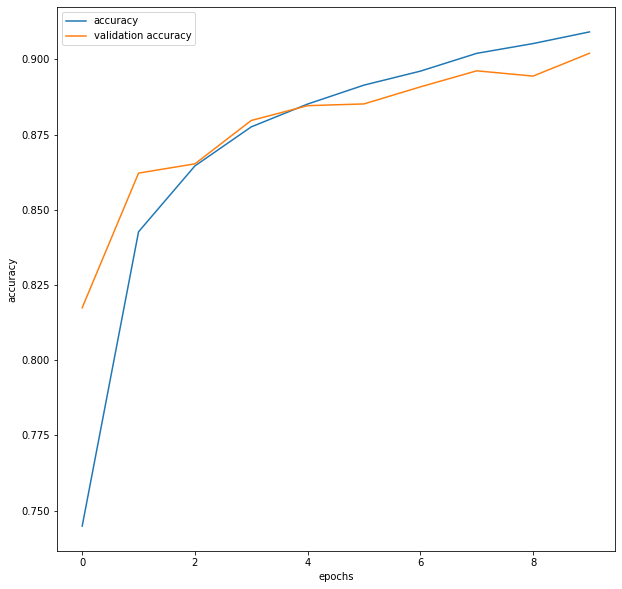

In [ ]:
# TODO: Plot accuracy and loss over epochs
plt.figure(figsize=(10, 10))
hist = pd.DataFrame(history_callback2.history)
plt.plot(hist.index,hist["loss"],label='train loss')
plt.plot(hist.index,hist["val_loss"],label='validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
hist = pd.DataFrame(history_callback2.history)
plt.plot(hist.index,hist["accuracy"],label='accuracy')
plt.plot(hist.index,hist["val_accuracy"],label='validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
# TODO: Report model performance on test set
score = model.evaluate(xtest,ytest,verbose=1)
print("Test loss: {:.3f}".format(score[0]))

# There are signs of overfitting in the sense that we do notice that the performance on the train dataset is getting progressively better than that on the validation dataset
# To address this, there are proven techniques that can help such as drop-out or batch normalization

313/313 [==============================] - 2s 5ms/step - loss: 0.2897 - accuracy: 0.8955
Test loss: 0.290


**What do you see from the plots? Are there signs of overfitting? If so, what are 
the signs and what techniques can we use to combat overfitting?**

### 4.2.4 Report metric score on test set

In [ ]:
# evaluate on test set
print("Test accuracy: {:.3f}".format(score[1]))

Test accuracy: 0.896


### 4.3 Overfitting

### 4.3.1 Drop-out

To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.5. Train the model again for 15 epochs, use two plots to display train vs validation metric scores and train vs validation loss over each epoch. Report model performance on test set. What's your observation?

In [ ]:
# TODO: build the model with drop-out layers
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', padding='same',input_shape=input_shape))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu',padding='valid'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=120,kernel_size=(5, 5),activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation = 'softmax'))

In [ ]:
# TODO: train the model
model.compile('adam','categorical_crossentropy',metrics=["accuracy"])
history_callback3 = model.fit(X_train,y_train,batch_size=128,epochs=15,validation_data=(X_val, y_val),verbose=1)

Epoch 1/15
375/375 [==============================] - 15s 39ms/step - loss: 0.9948 - accuracy: 0.6326 - val_loss: 0.8510 - val_accuracy: 0.7653
Epoch 2/15
375/375 [==============================] - 15s 39ms/step - loss: 0.6514 - accuracy: 0.7592 - val_loss: 0.6663 - val_accuracy: 0.8264
Epoch 3/15
375/375 [==============================] - 14s 36ms/step - loss: 0.5804 - accuracy: 0.7880 - val_loss: 0.6292 - val_accuracy: 0.8287
Epoch 4/15
375/375 [==============================] - 13s 36ms/step - loss: 0.5385 - accuracy: 0.8028 - val_loss: 0.5723 - val_accuracy: 0.8384
Epoch 5/15
375/375 [==============================] - 13s 35ms/step - loss: 0.5131 - accuracy: 0.8171 - val_loss: 0.5150 - val_accuracy: 0.8544
Epoch 6/15
375/375 [==============================] - 13s 35ms/step - loss: 0.4946 - accuracy: 0.8230 - val_loss: 0.4906 - val_accuracy: 0.8606
Epoch 7/15
375/375 [==============================] - 13s 35ms/step - loss: 0.4784 - accuracy: 0.8305 - val_loss: 0.4889 - val_accuracy:

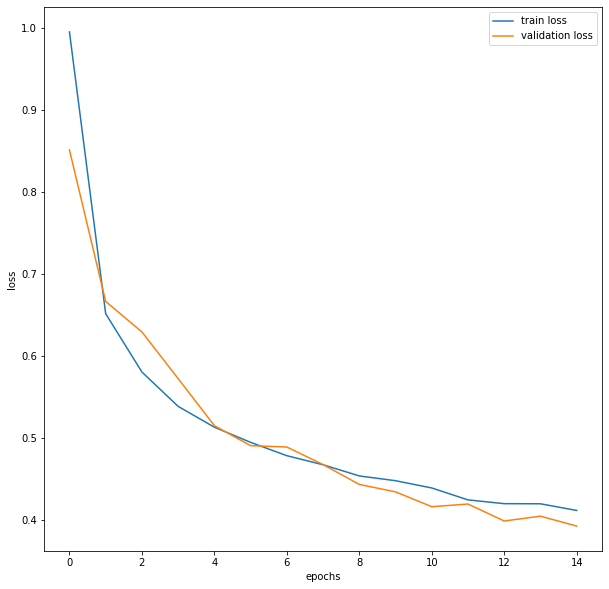

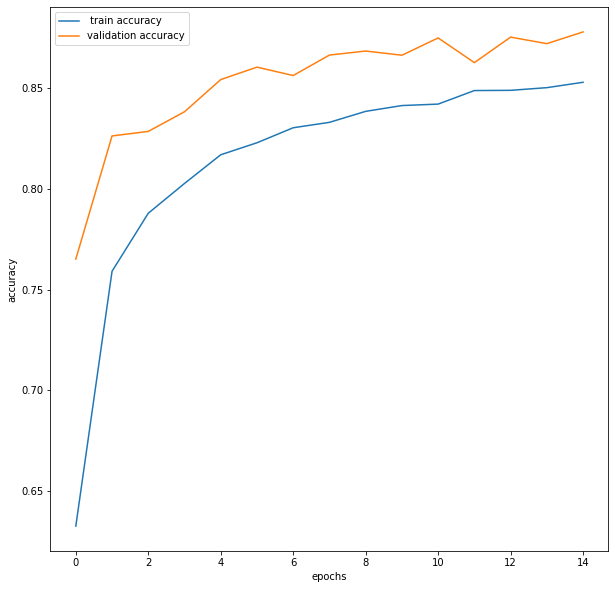

In [ ]:
# TODO: plot 
plt.figure(figsize=(10, 10))
hist = pd.DataFrame(history_callback3.history)
plt.plot(hist.index,hist["loss"],label='train loss')
plt.plot(hist.index,hist["val_loss"],label='validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
hist = pd.DataFrame(history_callback3.history)
plt.plot(hist.index,hist["accuracy"],label=' train accuracy')
plt.plot(hist.index,hist["val_accuracy"],label='validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
# TODO: Report model performance on test set
score = model.evaluate(xtest,ytest,verbose=1)
print("Test loss: {:.3f}".format(score[0]))
print("Test accuracy: {:.3f}".format(score[1]))

313/313 [==============================] - 1s 5ms/step - loss: 0.4007 - accuracy: 0.8691
Test loss: 0.401
Test accuracy: 0.869


**What's your observation?**

**Answer:** 
From these plots, we see that there is no longer overfitting as we could notice it previously. Indeed, both the train and validation loss/accuracy is progressively evolving in a similar way as the number of epochs increases

### 4.3.2 Batch Normalization

This time, let's apply a batch normalization after every hidden layer, train the model for 15 epochs, plot the metric scores and loss values, and report model performance on test set as above. Compare this technique with the original model and with dropout, which technique do you think helps with overfitting better?

In [ ]:
from keras.layers.normalization.batch_normalization import BatchNormalization
# TODO: build the model with batch normalization layers

model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', padding='same',input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=120,kernel_size=(5, 5),activation='relu'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(units=84, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=10, activation = 'softmax'))

In [ ]:
# TODO: train the model
model.compile('adam','categorical_crossentropy',metrics=["accuracy"])
history_callback3 = model.fit(X_train,y_train,batch_size=128,epochs=15,validation_data=(X_val, y_val),verbose=1)

Epoch 1/15
375/375 [==============================] - 19s 48ms/step - loss: 0.4492 - accuracy: 0.8400 - val_loss: 0.6315 - val_accuracy: 0.7854
Epoch 2/15
375/375 [==============================] - 18s 48ms/step - loss: 0.3055 - accuracy: 0.8870 - val_loss: 0.3699 - val_accuracy: 0.8581
Epoch 3/15
375/375 [==============================] - 18s 48ms/step - loss: 0.2631 - accuracy: 0.9021 - val_loss: 0.3159 - val_accuracy: 0.8840
Epoch 4/15
375/375 [==============================] - 18s 48ms/step - loss: 0.2402 - accuracy: 0.9099 - val_loss: 0.3094 - val_accuracy: 0.8892
Epoch 5/15
375/375 [==============================] - 18s 48ms/step - loss: 0.2167 - accuracy: 0.9190 - val_loss: 0.2953 - val_accuracy: 0.8920
Epoch 6/15
375/375 [==============================] - 18s 48ms/step - loss: 0.2010 - accuracy: 0.9251 - val_loss: 0.3043 - val_accuracy: 0.8878
Epoch 7/15
375/375 [==============================] - 18s 48ms/step - loss: 0.1863 - accuracy: 0.9299 - val_loss: 0.2667 - val_accuracy:

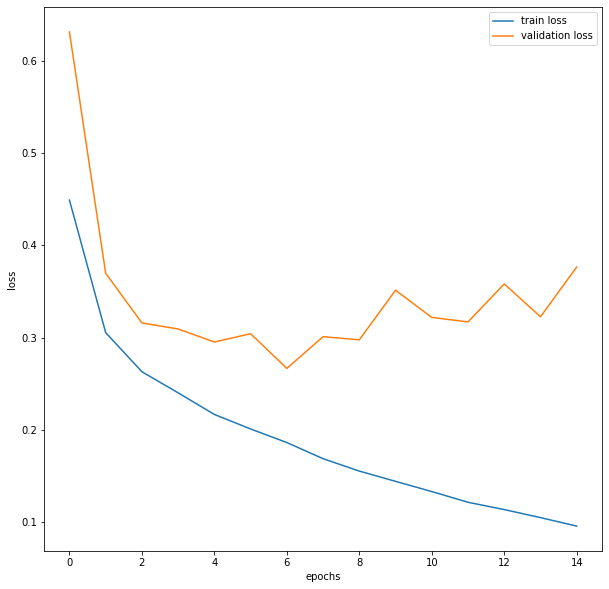

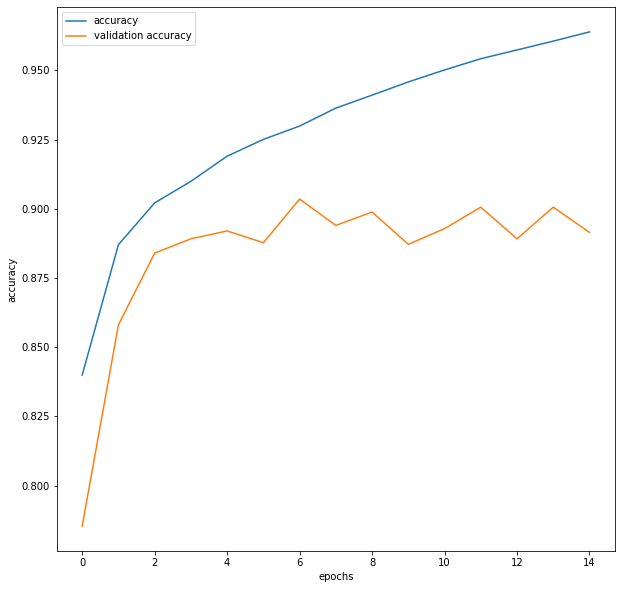

In [ ]:
# TODO: plot
plt.figure(figsize=(10, 10))
hist = pd.DataFrame(history_callback3.history)
plt.plot(hist.index,hist["loss"],label='train loss')
plt.plot(hist.index,hist["val_loss"],label='validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
hist = pd.DataFrame(history_callback3.history)
plt.plot(hist.index,hist["accuracy"],label='accuracy')
plt.plot(hist.index,hist["val_accuracy"],label='validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
# TODO: Report model performance on test set
score = model.evaluate(xtest,ytest,verbose=1)
print("Test loss: {:.3f}".format(score[0]))
print("Test accuracy: {:.3f}".format(score[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.4244 - accuracy: 0.8819
Test loss: 0.424
Test accuracy: 0.882


**Observation, comparison with Dropout:**

**Answer**: Batch normalization does not work as well to address overfitting compared to the dropout method. Here, we clearly see that the training accuracy/loss is not getting better in a similar way as the validation accuracy/loss as the number of epochs increases